<a href="https://colab.research.google.com/github/lf-fernandes/analise_airbnb_DSNP-modulo2-/blob/main/project1_DSNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install palettable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importar bibliotecas necessárias
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from palettable.colorbrewer.qualitative import Dark2_7



%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
#importando arquivo csv para análise

df = pd.read_csv("/content/drive/MyDrive/O que estou aprendendo/PROGRAMAÇÃO/PYTHON SIGMOIDAL/PROJETOS   EXERCICIOS/Analise Airbnb Roma/rome_listings.csv")

In [4]:
#análises preliminares

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23911 non-null  int64  
 1   name                            23908 non-null  object 
 2   host_id                         23911 non-null  int64  
 3   host_name                       23906 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23911 non-null  object 
 6   latitude                        23911 non-null  float64
 7   longitude                       23911 non-null  float64
 8   room_type                       23911 non-null  object 
 9   price                           23911 non-null  int64  
 10  minimum_nights                  23911 non-null  int64  
 11  number_of_reviews               23911 non-null  int64  
 12  last_review                     

##Dicionário de Variáveis



* id - Número de Id gerado para identificar o imóvel
* name - Nome da propriedade anunciada
* host_id - Número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - Sem valores válidos
* neighbourhood - Nome do bairro
* latitude - Coordenada da latitude da propriedade
* longitude - Coordenada da longitude da propriedade
* room_type - Informa o tipo de quarto que é oferecido
* price - Preço para locação
* minimum_nights - Quantidade mínima de noites para reservar
* number_of_reviews - Número de reviews que a propriedade possui
* last_review - Data do último review
* reviews_per_month - Quantidade de reviews por mês
* calculated_host_listining_count - Quantidade de imóveis do mesmo anfitrião
* avaliability_365 - Dias diponíveis dentro de 365 dias





In [5]:
#verificando valores nulos

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


In [6]:
#verificando a quantidade de valores ausentes 
df.isnull().sum()

id                                    0
name                                  3
host_id                               0
host_name                             5
neighbourhood_group               23911
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3941
reviews_per_month                  3941
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           20387
dtype: int64

In [51]:
# Preencher valores ausentes com 0
df.fillna(0, inplace=True)


****Q1 - Quais são os bairros em Roma com ofertas de quartos nesse período ?****

In [8]:
#Analisar os bairros do df
df.neighbourhood.unique()


array(['XV Cassia/Flaminia', 'VI Roma delle Torri', 'X Ostia/Acilia',
       'VII San Giovanni/Cinecittà', 'IX Eur', 'IV Tiburtina',
       'III Monte Sacro', 'VIII Appia Antica', 'XII Monte Verde',
       'XI Arvalia/Portuense', 'XIV Monte Mario', 'XIII Aurelia',
       'I Centro Storico', 'II Parioli/Nomentano',
       'V Prenestino/Centocelle'], dtype=object)

****Q2 - Qual a média de valor cobrado por bairro?****

Antes de chegar na média, vamos descobrir se existem valores que podem distorcer a nossa analise, descobrindo os outliers.

In [9]:
#verificando a distribuição estatistica
df.price.describe().round(1)

count    23911.0
mean       166.7
std        846.4
min          0.0
25%         65.0
50%        100.0
75%        157.0
max      90963.0
Name: price, dtype: float64

Alguns pontos chamam a atenção nessa distribuição:
 - O valor minimo cobrado por noite está em 0.
 - Em Q3 temos 157, porém no máximo temos 90963.
Fica claro que temos outliers em preço que irão prejudicar nossa análise.

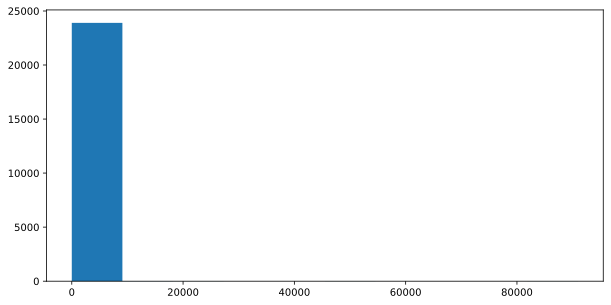

In [10]:
# verificando as distribuições com graficos
df.price.hist(figsize=(10,5),grid=False);

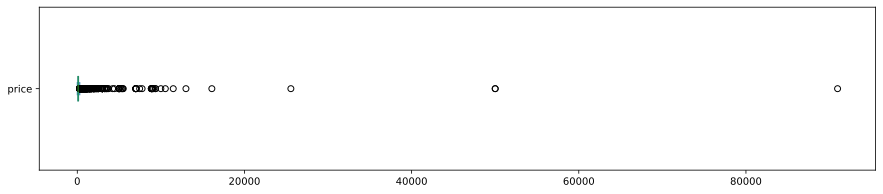


price: valores acima de 10000
8 entradas
0.0335%


In [11]:
#outliers em Price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#ver quantidades de valores acima de 10000
print("\nprice: valores acima de 10000")
print("{} entradas".format(len(df[df.price > 10000])))
print("{:.4f}%".format((len(df[df.price > 10000]) / df.shape[0])*100))

Com o Histograma plotado, fica mais claro que identificamos outliers no dataset, vamos fazer uma limpeza desses valores.

Para conseguirmos cortar os Outliers, vamos usar a regra de IQR Score.
O IQR é calculado substraindo o terceiro Quartil(75%) pelo Primeiro Quartil(25%)



In [12]:
#identificando os outliers 
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

#definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price + 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite interior de price: ', inf_price)

IQR da variável price:  92.0
Limite superior de price:  295.0
Limite interior de price:  203.0


In [57]:
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 295.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após da limpeza: ', df_clean.shape)

Shape antes da limpeza:  (23911, 18)
Shape após da limpeza:  (21885, 18)


Depois de encontrado o corte da variável price (295.0), vamos plotar o gráfico para ver como ficou

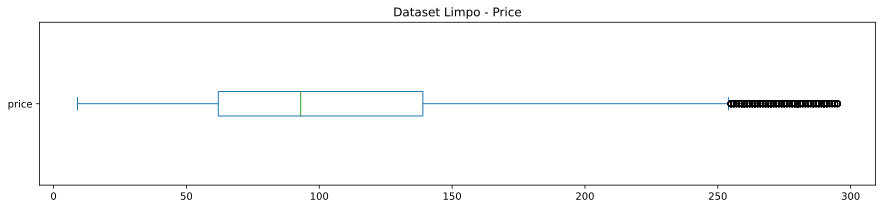

In [58]:
#verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - Price')
plt.show()



Text(0, 0.5, 'Ofertas')

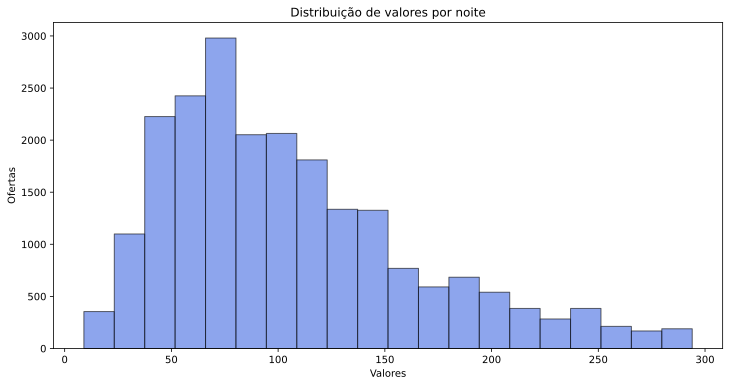

In [15]:
#histograma com dataset limpo

plt.figure(figsize = (12, 6))
df_clean[df_clean["price"] < 295]["price"].hist(bins = 20, ec = "k", alpha = .6, grid=False, color = "royalblue")

plt.title("Distribuição de valores por noite")
plt.xlabel("Valores")
plt.ylabel("Ofertas")


Agora com o Histograma plotado podemos ver que retiramos os outliers da análise.
Embora no boxplot mostre dados como outliers, esses estão sendo calculados em relação ao novo dataset, levando em consideração os quartis dos dados originais.

In [16]:
#verificando a distribuição estatística dos dados limpos
df_clean.price.describe().round(1)

count    21885.0
mean       106.3
std         58.9
min          9.0
25%         62.0
50%         93.0
75%        139.0
max        295.0
Name: price, dtype: float64

Em comparação com a distribuição antes da limpeza, não temos mais minimo = 0 e valores do Q3 estão bem próximo ao máximo de valores. A mediana também não foi muito alterada com a limpeza, o que indica que o IQR foi bem aplicado nesse caso.


Agora com a média reguladas, vamos buscar o preço médio por bairro em Roma.

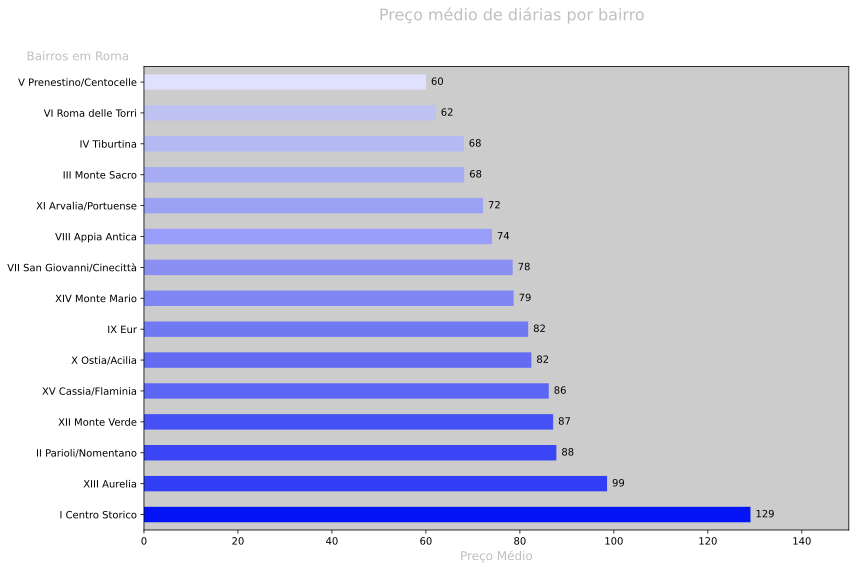

In [50]:
price_mean = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

freq_series = price_mean
y_labels = price_mean.index
frequencies = price_mean
colors = ['#0514f6', '#323ef5', '#3a46f6', '#4550f5', '#5c66f4', '#626bf2', '#7079f2', '#7f86f3', '#8a90f2','#989efa', '#9ba1f3', '#a7acf3', '#b5b9f3','#bec2f1', '#dfe1ff'] 

# Plot the figure.
fig = plt.figure(figsize=(12, 8))

ax = freq_series.plot(kind='barh', color = colors)
ax.set_facecolor("0.80")

ax.set_ylabel("")
ax.set_xlim(0, 150) #limitando o range do eixo X

  

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()  
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. 
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for

    #plotar Título
plt.text(50, 16, "Preço médio de diárias por bairro",
         fontsize=16,
         color='#C0C0C0'
         )

plt.text(-25, 15, "Bairros em Roma",
         verticalalignment="top",
         fontsize=12,
         color='#C0C0C0'
          )

plt.xlabel(('Preço Médio'), color='#C0C0C0', fontsize=12)               


fig.tight_layout()
plt.show()

Agora que sabemos quais são as médias de preços dos bairros em Roma, vamos descobrir se existe  correlação entre algumas variáveis escolhidas

In [113]:
corr = df_clean[['price', 'number_of_reviews', 'availability_365']].corr()
display(corr)

,price,number_of_reviews,availability_365
price,1.000000,-0.022676,0.170527
number_of_reviews,-0.022676,1.000000,0.009021
availability_365,0.170527,0.009021,1.000000


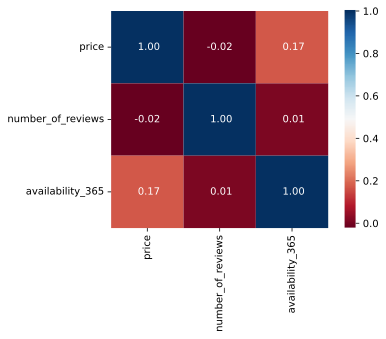

In [114]:
sns.heatmap(corr, cmap='RdBu', fmt=' .2f', square=True, linecolor='white', annot=True);

##Conclusão

Essa análise foi feita com uma base de dados resumidas do Airbnb, apenas para alguns insights iniciais. 

Conseguimos descobrir quais são os bairros com ofertas de locação de quartos ou apartamentos disponíveis na cidade de Roma e quais os valores médios das ofertas em cada bairro da cidade. Para isso utilizamos o método de análise de IQR Score para separar os outliers.

Também não foi encontrada nenhuma correlação significativa entre as váriaveis de preço, disponibilidade de dias dentro do ano e quantidade de reviews, para tomada de decisão.

